In [196]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Binary Classification with imbalance

for Binary Classification
- ROC
- AUC_ROC

for imbalance
- Precision
- Recall
- F1 / Fbeta

In [197]:
data = pd.read_csv('/content/Class_Ionosphere.csv')

In [198]:
data.Class.value_counts()

g    225
b    126
Name: Class, dtype: int64

In [199]:
data.isnull().sum()

RRD1     0
RRD2     0
RRD3     0
RRD4     0
RRD5     0
RRD6     0
RRD7     0
RRD8     0
RRD9     0
RRD10    0
RRD11    0
RRD12    0
RRD13    0
RRD14    0
RRD15    0
RRD16    0
RRD17    0
RRD18    0
RRD19    0
RRD20    0
RRD21    0
RRD22    0
RRD23    0
RRD24    0
RRD25    0
RRD26    0
RRD27    0
RRD28    0
RRD29    0
RRD30    0
RRD31    0
RRD32    0
RRD33    0
RRD34    0
Class    0
dtype: int64

In [200]:
y = data['Class']
X = data.drop(columns='Class')

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [203]:
y_pred = clf.predict(X_test)

classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

In [204]:
con_mat = confusion_matrix(y_test, y_pred)
print('confusion matrix: \n', con_mat)

confusion matrix: 
 [[21  7]
 [ 1 42]]


In [205]:
# take in predicted categorical values
accuracy = accuracy_score(y_test, y_pred)
print('accuracy: ', accuracy, '\n')
precision = precision_score(y_test, y_pred, pos_label='b')
print('precision: ', precision, '\n')
recall = recall_score(y_test, y_pred, pos_label='b')
print('recall: ', recall, '\n')
f1 = f1_score(y_test, y_pred, pos_label='b')
print('F1-score: ', f1, '\n')

accuracy:  0.8873239436619719 

precision:  0.9545454545454546 

recall:  0.75 

F1-score:  0.84 



In [206]:
y_pred_prob = clf.predict_proba(X_test)[:, :1]

In [207]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='b') #takes in probability of an instance having the pos label
print(" thresholds: ", thresholds)
print("false positive rates: ", fpr)
print("true positive rates: ", tpr)

 thresholds:  [2. 1. 0.]
false positive rates:  [0.         0.02325581 1.        ]
true positive rates:  [0.   0.75 1.  ]


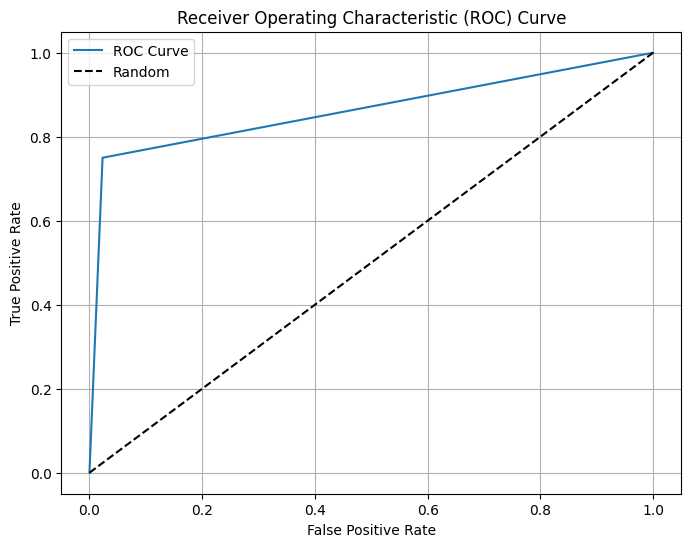

In [208]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()



In [209]:
area_under_roc = roc_auc_score(y_test, y_pred_prob)
print("auc score: ", area_under_roc)

auc score:  0.13662790697674418


In [210]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           b       0.95      0.75      0.84        28
           g       0.86      0.98      0.91        43

    accuracy                           0.89        71
   macro avg       0.91      0.86      0.88        71
weighted avg       0.90      0.89      0.88        71



## Mulitclass classification with class imbalance

- Balanced Accuracy
-Average Precision
- Average Recall
- AUC_ROC
- Average F1/ Fbeta

In [211]:
df = pd.read_csv('/content/predictive_maintenance.csv')

In [212]:
df.Type.value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [213]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [214]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [215]:
model = DecisionTreeClassifier()
model.fit(X_train_, y_train_)

DecisionTreeClassifier()

In [216]:
y_pred_ = model.predict(X_test_)

In [217]:
con_mat = confusion_matrix(y_test_, y_pred_)
print('confusion matrix: \n', con_mat)

confusion matrix: 
 [[21  4]
 [ 3 43]]


In [218]:
accuracy = balanced_accuracy_score(y_test_, y_pred_)
print('accuracy: ', accuracy, '\n')
precision = precision_score(y_test_, y_pred_, average='weighted')
print('precision: ', precision, '\n')
recall = recall_score(y_test_, y_pred_, average='weighted')
print('recall: ', recall, '\n')
f1 = f1_score(y_test_, y_pred_, average='weighted')
print('F1-score: ', f1, '\n')

accuracy:  0.8873913043478261 

precision:  0.9008465687743482 

recall:  0.9014084507042254 

F1-score:  0.9009324765799096 



In [219]:
y_pred_prob_ = model.predict_proba(X_test_)[:, 1]

In [220]:
area_under_roc = roc_auc_score(y_test_, y_pred_prob_)
print("auc score: ", area_under_roc)

auc score:  0.8873913043478261


In [225]:
report_ = classification_report(y_test_, y_pred_)
print(report_)

              precision    recall  f1-score   support

           b       0.88      0.84      0.86        25
           g       0.91      0.93      0.92        46

    accuracy                           0.90        71
   macro avg       0.89      0.89      0.89        71
weighted avg       0.90      0.90      0.90        71

